In [162]:
# Imports libraries 
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import os
import mediapy as media
from tqdm import tqdm
import mujoco_viewer

# Robotics toolbox and dependencies
import roboticstoolbox as rtb
import spatialmath as sm
from spatialmath import UnitQuaternion, SE3
from spatialmath.base import q2r, r2x, rotx, roty, rotz, r2q, q2r
from mujoco_parser import MuJoCoParserClass

# Import local libraries
from Ur5e import Ur5e
from actuator import ActuatorMotor, update_actuator
from quaternion_helper import *

In [163]:
# Make ur5e instance
if 'ur5e' in locals():
    print('ur5e already exists')
    del ur5e

try:
    ur5e
except NameError:
    print('ur5e does not exist')
    ur5e = Ur5e()

ur5e already exists
ur5e does not exist


In [164]:
# Make actuator instance torque controlled
try:
    actuator
except NameError:
    actuator = ActuatorMotor()

forces_ctrl_range = np.array([[-150, 150], [-150, 150], [-150, 150], [-28, 28], [-28, 28], [-28, 28]])

for actuator_id in range(ur5e.m.nu):
    update_actuator(ur5e.m, actuator_id, actuator, ctrlrange=forces_ctrl_range[actuator_id])

In [165]:
# Visualize mujoco, Show initial state of the scene

# Use forward dynamics to get the initial state of the data
mujoco.mj_forward(ur5e.m, ur5e.d)
# render the initial state
if 'renderer' in locals():
    print('renderer already exists')
    del renderer


try:
    renderer
except NameError:
    renderer = mujoco.Renderer(ur5e.m, 480, 640)


#renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
#media.show_image(renderer.render())

renderer already exists


# Trajectory

In [166]:
poi = np.array([
    #[93, 243],
    [500, 550],
    [130, 243],
    [130, 223],
    [175, 223],
    [175, 263],
    [130, 263],
    [130, 223],
    [175, 223],
    [175, 243],
    [213, 243],
    [213, 223],
    [254, 223],
    [254, 164],
    [334, 164],
    [334, 144],
    [379, 144],
    [379, 184],
    [334, 184],
    [334, 144],
    
])

poi = poi + np.array([0, -281])

print(poi)
#plt.plot(poi[:, 0], poi[:, 1])
#plt.show()

'''
    [379, 144],
    [379, 164],
    [663, 164],
    [663, 271],
    [648, 271],
    [648, 289],
    [663, 289],
    [663, 392],
    [379, 392],
    [379, 372],
    [334, 372],
    [334, 412],
    [379, 412],
    [379, 372],
    [334, 372],
    [334, 392],
    [254, 392],
    [254, 339],
    [213, 339],
    [213, 319],
    [175, 319],
    [175, 339],
    [130, 339],
    [130, 319],
    [93, 319],
    [130, 319],
    [130, 299],
    [175, 299],
    [175, 319],
    [213, 319],
    [213, 299],
    [297, 299],
    [297, 339],
    [213, 339],
    [213, 299],
    [297, 299],
    [297, 319],
    [334, 319],
    [334, 299],
    [379, 299],
    [379, 339],
    [334, 339],
    [334, 299],
    [379, 299],
    [379, 319],
    [435, 319],
    [435, 292],
    [444, 281],
    [480, 281],
    [480, 261],
    [525, 261],
    [525, 281],
    [565, 281],
    [565, 301],
    [648, 301],
    [648, 261],
    [565, 261],
    [565, 281],
    [525, 281],
    [525, 301],
    [480, 301],
    [480, 281],
    [444, 281],
    [435, 272],
    [425, 281],
    [435, 292],
    [444, 281],
    [435, 272],
    [435, 243],
    [379, 243],
    [379, 263],
    [334, 263],
    [334, 243],
    [297, 243],
    [297, 263],
    [213, 263],
    [213, 223],
    [297, 223],
    [297, 243],
    [334, 243],
    [334, 223],
    [379, 223],
    [379, 243]
    '''

[[ 500  269]
 [ 130  -38]
 [ 130  -58]
 [ 175  -58]
 [ 175  -18]
 [ 130  -18]
 [ 130  -58]
 [ 175  -58]
 [ 175  -38]
 [ 213  -38]
 [ 213  -58]
 [ 254  -58]
 [ 254 -117]
 [ 334 -117]
 [ 334 -137]
 [ 379 -137]
 [ 379  -97]
 [ 334  -97]
 [ 334 -137]]


'\n    [379, 144],\n    [379, 164],\n    [663, 164],\n    [663, 271],\n    [648, 271],\n    [648, 289],\n    [663, 289],\n    [663, 392],\n    [379, 392],\n    [379, 372],\n    [334, 372],\n    [334, 412],\n    [379, 412],\n    [379, 372],\n    [334, 372],\n    [334, 392],\n    [254, 392],\n    [254, 339],\n    [213, 339],\n    [213, 319],\n    [175, 319],\n    [175, 339],\n    [130, 339],\n    [130, 319],\n    [93, 319],\n    [130, 319],\n    [130, 299],\n    [175, 299],\n    [175, 319],\n    [213, 319],\n    [213, 299],\n    [297, 299],\n    [297, 339],\n    [213, 339],\n    [213, 299],\n    [297, 299],\n    [297, 319],\n    [334, 319],\n    [334, 299],\n    [379, 299],\n    [379, 339],\n    [334, 339],\n    [334, 299],\n    [379, 299],\n    [379, 319],\n    [435, 319],\n    [435, 292],\n    [444, 281],\n    [480, 281],\n    [480, 261],\n    [525, 261],\n    [525, 281],\n    [565, 281],\n    [565, 301],\n    [648, 301],\n    [648, 261],\n    [565, 261],\n    [565, 281],\n    [525, 28

In [167]:
# Generate trajectory

#startpos = np.array([0, 0, 0])
T0 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0]) # sm.SE3.Trans(0.5, 0, 0.3) * sm.SE3.RPY([0, np.pi, 0]) changed z from 0.3 to 0.4 to avoid collision
T1 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0])
dt = 0.002 
endTime = 0.3
n = int(endTime/dt)

if 'ctr' not in locals():
    ctr = np.array([])
    times = np.array([])
    startTime = 0
    scalingX = 5000
    scalingY = 2500
    movementX = 0.4
    movementY = 0.0



    for i in tqdm(range(0, poi.shape[0]-1)):
        distance = np.sqrt((poi[i+1, 0] - poi[i, 0])**2 + (poi[i+1, 1] - poi[i, 1])**2)
        endTime = distance*0.05
        n = int(endTime/dt)
        T0.t[0] = movementX + poi[i, 0]/scalingX
        T0.t[1] = movementY + poi[i, 1]/scalingY
        T1.t[0] = movementX + poi[i+1, 0]/scalingX
        T1.t[1] = movementY + poi[i+1, 1]/scalingY
        trajectory = rtb.ctraj(T0, T1, n)
        time = np.linspace(startTime, startTime+endTime, n)
        startTime = startTime+endTime
        if i == 0:
            ctr = trajectory
            times = time
        else:
            x = ctr.Alloc(len(ctr)+len(trajectory))
            for j in range(0, len(ctr)):
                x[j] = ctr[j]
            for j in range(0, len(trajectory)):
                x[j+len(ctr)] = trajectory[j]
            ctr = x
            times = np.append(times, time)



    #differentiate to find velocity
    velocityX = np.gradient(ctr.t[:,0])
    velocityY = np.gradient(ctr.t[:,1])
    velocityZ = np.gradient(ctr.t[:,2])

    velocity = np.transpose(np.array([velocityX, velocityY, velocityZ]))

    #differentiate to find acceleration
    accelerationX  = np.gradient(velocityX)
    accelerationY  = np.gradient(velocityY)
    accelerationZ  = np.gradient(velocityZ)

    acceleration = np.transpose(np.array([accelerationX, accelerationY, accelerationZ]))        
    print(f"No of points in trajectory: {len(ctr)}") 


In [168]:
'''
# Visualize trajectory
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.plot(ctr.t[:,0], ctr.t[:,1])
axs.set_title("Trajectory in XY plane")
axs.set_aspect(1)



fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Pos, Velocity and Acceleration in X direction')
axs[0].plot(times, ctr.t[:,0])
axs[0].set_title('Position in X direction')
axs[1].plot(times, velocity[:,0])
axs[1].set_title('Velocity in X direction')
axs[2].plot(times, acceleration[:,0])
axs[2].set_title('Acceleration in X direction')

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Pos, Velocity and Acceleration in Y direction')
axs[0].plot(times, ctr.t[:,1])
axs[0].set_title('Position in Y direction')
axs[1].plot(times, velocity[:,1])
axs[1].set_title('Velocity in Y direction')
axs[2].plot(times, acceleration[:,1])
axs[2].set_title('Acceleration in Y direction')'''




'\n# Visualize trajectory\nfig, axs = plt.subplots(1, 1, figsize=(10, 10))\naxs.plot(ctr.t[:,0], ctr.t[:,1])\naxs.set_title("Trajectory in XY plane")\naxs.set_aspect(1)\n\n\n\nfig, axs = plt.subplots(3, 1, figsize=(10, 10))\nfig.suptitle(\'Pos, Velocity and Acceleration in X direction\')\naxs[0].plot(times, ctr.t[:,0])\naxs[0].set_title(\'Position in X direction\')\naxs[1].plot(times, velocity[:,0])\naxs[1].set_title(\'Velocity in X direction\')\naxs[2].plot(times, acceleration[:,0])\naxs[2].set_title(\'Acceleration in X direction\')\n\nfig, axs = plt.subplots(3, 1, figsize=(10, 10))\nfig.suptitle(\'Pos, Velocity and Acceleration in Y direction\')\naxs[0].plot(times, ctr.t[:,1])\naxs[0].set_title(\'Position in Y direction\')\naxs[1].plot(times, velocity[:,1])\naxs[1].set_title(\'Velocity in Y direction\')\naxs[2].plot(times, acceleration[:,1])\naxs[2].set_title(\'Acceleration in Y direction\')'

[ 0.46290788 -1.63627571 -1.85986482 -1.21624836  1.57079644  2.03370421]


""

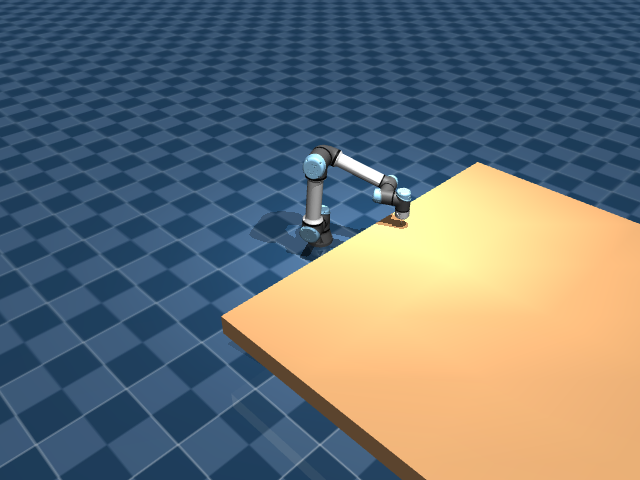

In [181]:
# Use the inverse kinematics to make a start pose for the robot
sol = ur5e.invkin(ctr[0])
print(sol.q)
# visualize the position
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)
renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
media.show_image(renderer.render())
# joints pose
#[ 0.46362935 -1.63647675 -1.8596509  -1.2162613   1.57079635  2.03442568] # CBF

# Controller

In [182]:
import numpy as np
import mujoco
from tqdm import tqdm

# Define Impedance Control Matrices
STIFFNESS = np.array([5000, 5000, 5000, 250, 250, 250])  # Stiffness matrix - 5550
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)
#MAX_TORQUE = np.array([150.0, 150.0, 150.0, 28.0, 28.0, 28.0])

# Compliance parameters
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# Initialize error terms
x_e = np.zeros(6)  # Position error
v_e = np.zeros(6)  # Velocity error

duration = 5  # seconds
framerate = 30  # Hz
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# Logging and video capture
contact_points = []
contact_forces = []
frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 6))  # Ensure forces match 6D wrench
torques = np.zeros((n_steps, 6))
target_positions_as_quat = np.zeros((n_steps, 7))
target_positions = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
contact_points = []
contact_forces = []
p_contacts_log = np.zeros((n_steps, 4))
time_log = []
force_log = []  # to store the first 3 components of the external force

# Reset MuJoCo Simulation
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Get Cartesian position and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    # DLS
    if(np.abs(np.linalg.det(J)) <= 0.001):
        print("Singular configuration ", ur5e.d.time, np.linalg.det(J))
        break
    # Get force at the end effector
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    '''
    p_contacts, f_contacts, geom1s, geom2s, p_distance= ur5e.get_contact_info()

    for (p_contact, f_contact, geom1, geom2) in zip(p_contacts, f_contacts, geom1s, geom2s):
        for p in p_contacts:  # Store all contact points
            contact_points.append(list(p))

        contact_forces.append(list(f_contact))
    #p_contacts, f_contacts, geom1s, geom2s, p_distance = ur5e.get_contact_info()
    #for (p_contact, f_contact, geom1, geom2) in zip(p_contacts, f_contacts, geom1s, geom2s):
    #    contact_points.append(list(p_contact))  # Store X, Y, Z
    #    contact_forces.append(np.linalg.norm(f_contact))  # Store magnitude of force
    '''

    # Compute trajectory error
    target_pose = tcp_pos 
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.05 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # Ensure 6D error

    # How it is done in URscript version (convert current pose into TCP frame, uses tcp_pos from fkin)
    error_SE3 = tcp_pos.inv() * target_pose  # Compute error in TCP frame
    error_translation = error_SE3.A[:3, 3]  # XYZ
    error_rotation = sm.SO3(error_SE3.R).rpy(order="xyz")  # Roll-pitch-yaw
    error_in_TCP_frame = np.concatenate((error_translation, error_rotation))  # Convert to NumPy
    #print("error TCP frame" ,error_in_TCP_frame)
    #print("error base frame2" ,error_in_base_frame)
    v_e = J @ ur5e.d.qvel
    
    # Compute impedance force
    wrench = STIFFNESS * error_in_base_frame - DAMPING * v_e #- f_ext
    
    # Compute joint forces
    tau = J.T @ wrench
    mass_matrix = np.zeros((6, 6))  
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()  # ??
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces
    
    # Clamp torques
    #tau = np.clip(tau, -MAX_TORQUE, MAX_TORQUE)
    
    ##########################################################################################
    ##### Meget computationally heavy, kun gør hvis man har brug for x, v og a plots #########
    ##########################################################################################
    # get translational part of T_pen_array
    #p = np.zeros((len(ctr), 2))
    #for i in range(len(ctr)):
    #    p[i] = ctr[i].t[0:2]
    #p = np.hstack((p, np.zeros((len(ctr), 1)), np.ones((len(ctr), 1)), np.zeros((len(ctr), 1))))
    #dp = np.gradient(p, axis=0)
    #ddp = np.gradient(dp, axis=0)

    # Apply torque control
    ur5e.d.ctrl[:] = tau
    
    # Log data
    quat_e = r2q(tcp_pos.R)
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate([tcp_pos.t, tcp_pos.rpy(order='xyz')])
    velocities[idx] = v_e
    forces[idx] = wrench  # Ensure correct shape
    torques[idx] = tau
    target_positions_as_quat[idx] = positions_as_quat[idx]
    target_positions[idx] = positions_as_rpy[idx]
    target_velocities[idx] = velocities[idx]
    time_log.append(ur5e.d.time)
    force_log.append(f_ext[:3])
    
    # Capture video frames
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    # Step simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

# Show video
if showVideo:
    media.show_video(frames, fps=framerate)
#print(forces)

  8%|▊         | 0.4120000000000003/5 [00:16<03:07, 40.83s/it]
100%|█████████▉| 4.999999999999671/5 [00:04<00:00,  1.19it/s] 


# Impedance with CBF constraining joint torques, barrier func h does not work properly

In [185]:
import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

solvers.options['show_progress'] = False

# cartesian impedance
STIFFNESS = np.array([5000, 5000, 5000, 1000, 1000, 1000])
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)

# cartesian admittance
M_diag = np.array([5.0]*6)
D_diag = np.array([5, 5, 5, 10, 10, 10])
K_diag = np.array([10, 10, 10, 5, 5, 5])
M_cart = np.diag(M_diag)
D_cart = np.diag(D_diag)
K_cart = np.diag(K_diag)

MAX_TORQUE = np.array([1.0, 30.0, 30.0, 28.0, 28.0, 28.0])
MIN_TORQUE = -np.array([1.0, 30.0, 30.0, 28.0, 28.0, 28.0])

alpha = 0.1  # scaling factor for the barrier term
gamma = 0.0  # offset

# The safe set is:
#    C = { τ : MIN_TORQUE <= τ <= MAX_TORQUE }.
# We define two barrier functions for each joint:
#   h_lower(τ_i) = τ_i - MIN_TORQUE_i,   L_f h_lower = 0, L_g h_lower = 1.
#   h_upper(τ_i) = MAX_TORQUE_i - τ_i,   L_f h_upper = 0, L_g h_upper = -1.
#
# We impose extra constraints in discrete time:
#   τ_safe_i >= τ_nom_i - α (τ_nom_i - MIN_TORQUE_i) + γ,
#   τ_safe_i <= τ_nom_i + α (MAX_TORQUE_i - τ_nom_i) - γ.
# These, together with the box constraints MIN_TORQUE <= τ_safe <= MAX_TORQUE,
# form our full CBF-based constraints.

duration = 5         
framerate = 30       
stepsize = ur5e.m.opt.timestep 
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

time_log           = []
nominal_torque_log = np.zeros((n_steps, 6))
safe_torque_log    = np.zeros((n_steps, 6))
barrier_log        = np.zeros((n_steps, 6))

frames = []  # for video capture

mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

###############################################################################
########## Extended QP-based Torque Projection (with ECBF terms) #############
###############################################################################
def torque_cbf_projection_extended(tau_nom, MIN_TORQUE, MAX_TORQUE, alpha, gamma):
    """
    Projects the nominal torque tau_nom onto the safe set defined by:
         MIN_TORQUE <= tau_safe <= MAX_TORQUE,
    with additional exponential barrier constraints:
         tau_safe >= tau_nom - alpha*(tau_nom - MIN_TORQUE) + gamma,
         tau_safe <= tau_nom + alpha*(MAX_TORQUE - tau_nom) - gamma.
    
    The QP is:
       minimize   (1/2)||tau_safe - tau_nom||^2
       subject to:
         tau_safe <= MAX_TORQUE,
         -tau_safe <= -MIN_TORQUE,
         -tau_safe <= -[tau_nom - alpha*(tau_nom - MIN_TORQUE) + gamma],
         tau_safe <= tau_nom + alpha*(MAX_TORQUE - tau_nom) - gamma.
    
    This QP uses the standard CVXOPT format.
    """
    n = tau_nom.shape[0]
    P = 2 * np.eye(n)
    q = -2 * tau_nom
    
    # Box constraints:
    A1 = np.eye(n)
    b1 = MAX_TORQUE
    A2 = -np.eye(n)
    b2 = -MIN_TORQUE
    
    # Exponential (barrier) constraints:
    # Lower barrier: tau_safe >= tau_nom - alpha*(tau_nom - MIN_TORQUE) + gamma
    #   -> -tau_safe <= -[tau_nom - alpha*(tau_nom - MIN_TORQUE) + gamma]
    A3 = -np.eye(n)
    b3 = -(tau_nom - alpha*(tau_nom - MIN_TORQUE) + gamma)
    # Upper barrier: tau_safe <= tau_nom + alpha*(MAX_TORQUE - tau_nom) - gamma
    A4 = np.eye(n)
    b4 = tau_nom + alpha*(MAX_TORQUE - tau_nom) - gamma

    # Stack constraints
    G = np.vstack((A1, A2, A3, A4))
    h_vec = np.hstack((b1, b2, b3, b4))
    
    # cvxopt matrices
    P_cvx = matrix(P)
    q_cvx = matrix(q)
    G_cvx = matrix(G)
    h_cvx = matrix(h_vec)
    
    sol = solvers.qp(P_cvx, q_cvx, G_cvx, h_cvx)
    tau_safe = np.array(sol['x']).flatten()
    return tau_safe

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    

    t = ur5e.d.time
    x_diff = 0.1 * (1 - np.cos(n_steps * 0.01))
    z_diff = 0.05 * (1 - np.cos(n_steps * 0.01))
    T_offset = sm.SE3.Trans(x_diff, 0, z_diff)  # translation transform
    target_pose = tcp_pos * T_offset
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))
    
    # Cartesian admittance dynamics.
    # M*ẍ + D*ẋ + K*x = f_ext, so ẍ = M⁻¹ (f_ext - K*x_e - D*v_e).
    f_ext *= compliance_vector 
    acc_e = np.linalg.inv(M_cart) @ (f_ext - K_cart @ x_e - D_cart @ v_e)
    v_e = v_e + stepsize * 0.5 * (acc_e)
    x_e = x_e + stepsize * 0.5 * (v_e)
    
    # impedance control
    wrench = STIFFNESS * error_in_base_frame - DAMPING * (J @ ur5e.d.qvel)
    tau_nominal = J.T @ wrench
    mass_matrix = np.zeros((6, 6))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau_nominal += mass_matrix @ ur5e.d.qacc + coriolis_forces
    
    # ---------------------------------------------------------------------
    # Compute the barrier function h(x) for each joint.
    # We define for joint i:
    #   h_lower_i = tau_nominal[i] - MIN_TORQUE[i]
    #   h_upper_i = MAX_TORQUE[i] - tau_nominal[i]
    # And take h_i = min(h_lower_i, h_upper_i) as the margin.
    
    # ---------------------------------------------------------------------
    # Apply the extended QP projection (CBF) to get safe torques.
    tau_safe = torque_cbf_projection_extended(tau_nominal, MIN_TORQUE, MAX_TORQUE, alpha, gamma)
    h_barrier = np.minimum(tau_safe - MIN_TORQUE, MAX_TORQUE - tau_safe)
    
    time_log.append(t)
    nominal_torque_log[idx, :] = tau_nominal
    safe_torque_log[idx, :]    = tau_safe
    barrier_log[idx, :]        = h_barrier

    ur5e.d.ctrl[:] = tau_safe

    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()


# Optionally, display the recorded video.
if showVideo and len(frames) > 0:
    media.show_video(frames, fps=framerate)


  0%|          | 0/5 [00:00<?, ?it/s]

100%|█████████▉| 4.999999999999671/5 [00:09<00:00,  1.87s/it]  


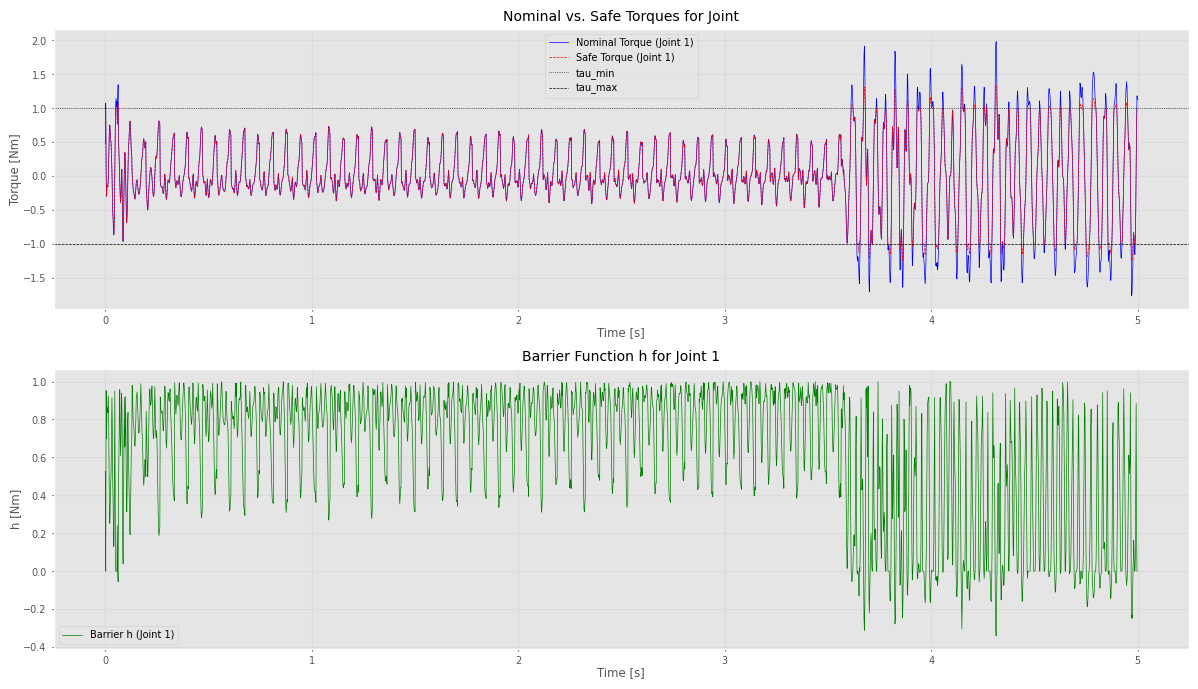

In [186]:

time_array = np.array(time_log)

plt.figure(figsize=(12, 10))
joint = 0
# Plot nominal vs. safe torques for Joint 1 (index 0)
plt.subplot(3, 1, 1)
plt.plot(time_array, nominal_torque_log[:, joint], 'b-', label='Nominal Torque (Joint 1)')
plt.plot(time_array, safe_torque_log[:, joint], 'r--', label='Safe Torque (Joint 1)')
plt.axhline(MAX_TORQUE[joint], color='k', linestyle=':', label='tau_min')
plt.axhline(MIN_TORQUE[joint], color='k', linestyle='--', label='tau_max')
plt.xlabel('Time [s]')
plt.ylabel('Torque [Nm]')
plt.title('Nominal vs. Safe Torques for Joint')
plt.legend()
plt.grid(True)

# Plot barrier function h for Joint 1: h = MAX_TORQUE - τ_safe.
plt.subplot(3, 1, 2)
plt.plot(time_array, barrier_log[:, joint], 'g-', label='Barrier h (Joint 1)')
plt.xlabel('Time [s]')
plt.ylabel('h [Nm]')
plt.title('Barrier Function h for Joint 1')
plt.legend()
plt.grid(True)

# Plot the actual joint positions for Joint 1 (from q_log).
#plt.subplot(3, 1, 3)
#plt.plot(time_array, q_log[:, joint], 'k-', label='Joint 1 Position (Actual)')
#plt.xlabel('Time [s]')
#plt.ylabel('Position [rad or m]')
#plt.title('Actual Joint 1 Position Over Time')
#plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

# Imp following rajec CBF constraint f_z

  0%|          | 0/5 [00:00<?, ?it/s]

100%|█████████▉| 4.999999999999671/5 [00:05<00:00,  1.11s/it]  


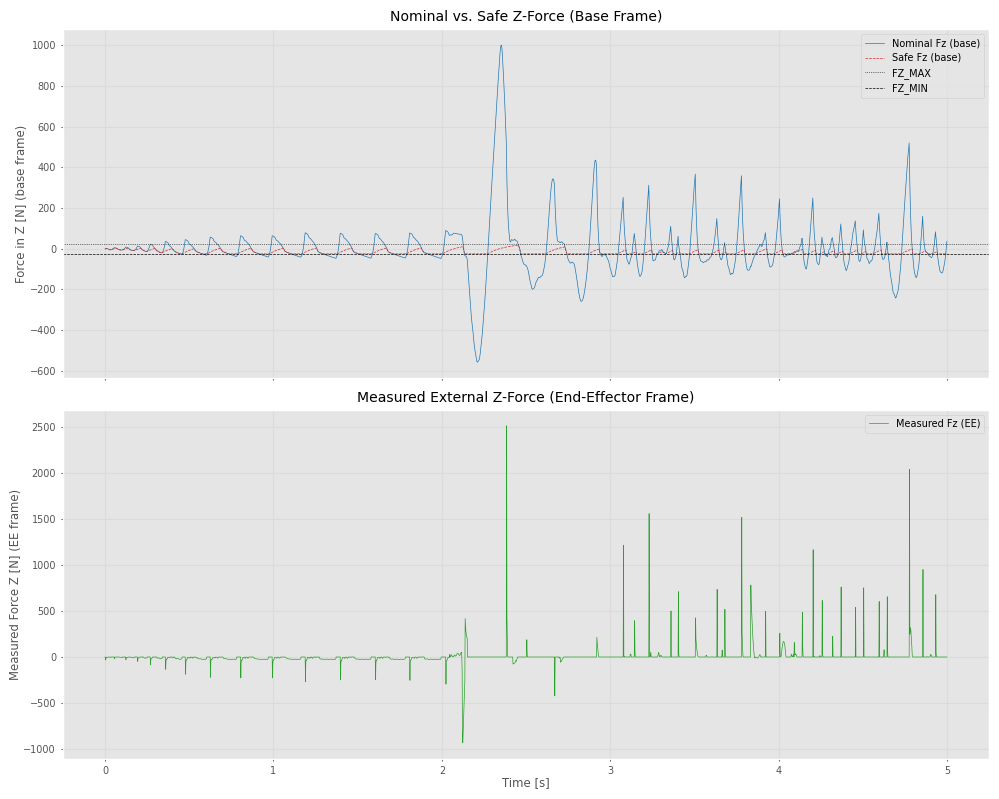

In [190]:
import numpy as np
import mujoco
from tqdm import tqdm
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# ----------------------------------------------------------------
# CVXOPT settings: Disable solver output for cleaner logs.
solvers.options['show_progress'] = False

# ----------------------------------------------------------------
# Impedance controller parameters
STIFFNESS = np.array([5000, 5000, 5000, 1000, 1000, 1000])
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)

# Define safe limits for the z-force
FZ_MAX = 25.0   # maximum allowable force in z-direction [N]
FZ_MIN = -25.0  # minimum allowable force in z-direction [N]

# (Optional) compliance vector if needed
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# CBF parameter (for Lie derivative term)
lambda_cbf = 10.0  # you can tune this value

# Simulation parameters
duration = 5         # seconds
framerate = 30       # Hz
dt = ur5e.m.opt.timestep  # simulation timestep
n_steps = int(np.ceil(duration / dt))
showVideo = True

# ----------------------------------------------------------------
# Logging arrays
time_log     = []
Fz_nom_log   = np.zeros(n_steps)   # nominal z-force from impedance (EE frame)
Fz_safe_log  = np.zeros(n_steps)   # safe (projected) z-force (EE frame)
barrier_log  = np.zeros(n_steps)   # barrier function h = FZ_MAX - Fz_safe
Fz_meas_ee   = np.zeros(n_steps)   # measured external force in end-effector z
frames       = []                  # for video capture, if desired

# ----------------------------------------------------------------
# Reset the simulation
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

# Initialize Fz_prev (for the CBF discrete-time condition)
Fz_prev = 0.0

def force_z_cbf_projection(Fz_des, FZ_MAX, FZ_MIN, Fz_prev, dt, lambda_cbf):
    """
    Projects the desired z-force Fz_des onto the safe set while enforcing a
    discrete-time CBF constraint based on the Lie derivative.

    The safe set is defined by FZ_MIN <= Fz <= FZ_MAX and the CBF condition
      (Fz_safe - Fz_prev)/dt <= lambda_cbf*(FZ_MAX - Fz_prev).

    This is implemented by computing an effective upper bound:
      c = min{ FZ_MAX, Fz_prev + dt * lambda_cbf * (FZ_MAX - Fz_prev) }.
    
    The QP then minimizes (1/2)*(Fz_safe - Fz_des)^2 subject to:
         Fz_safe <= c   and   Fz_safe >= FZ_MIN.
    """
    # Compute the extra upper bound from the Lie derivative condition.
    c = min(FZ_MAX, Fz_prev + dt * lambda_cbf * (FZ_MAX - Fz_prev))
    n = 1  # scalar problem
    P = 2 * np.eye(n)
    q = -2 * np.array([Fz_des])
    # Constraints: Fz_safe <= c and -Fz_safe <= -FZ_MIN (i.e. Fz_safe >= FZ_MIN)
    G = np.vstack(( np.array([[1.0]]), np.array([[-1.0]]) ))
    h = np.hstack(( np.array([c]), np.array([-FZ_MIN]) ))
    
    # Convert to cvxopt matrices and solve
    P_cvx = matrix(P)
    q_cvx = matrix(q)
    G_cvx = matrix(G)
    h_cvx = matrix(h)
    sol = solvers.qp(P_cvx, q_cvx, G_cvx, h_cvx)
    Fz_safe = np.array(sol['x']).flatten()[0]
    return Fz_safe

# ----------------------------------------------------------------
# Main simulation loop
while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(dt)
    
    # Get current end-effector pose (tcp_pos)
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    # Rotation matrix from base frame to EE frame:
    # tcp_pos.R is typically a 3x3 orientation from base to end-effector.
    R_ee_in_base = tcp_pos.R  

    # Get the Jacobian (for base->EE velocity mapping)
    J = ur5e.jacob0(ur5e.d.qpos)

    # (Optional) DLS for robust inversion if needed
    lambda_damp = 0.01
    if np.abs(np.linalg.det(J)) <= 0.001:
        J_inv = J.T @ np.linalg.inv(J @ J.T + lambda_damp**2 * np.eye(J.shape[0]))
    else:
        J_inv = np.linalg.pinv(J)

    # ----------------------------------------------------------------
    # (1) Measure external force in the BASE frame
    f_ext_base = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext_base[:3] = contact_forces[0]  # x,y,z in base frame
    
    # (2) Transform the base-frame 3D force into the END-EFFECTOR frame
    #     ignoring torques for simplicity. 
    #     R_ee_in_base is the orientation from base->EE, so:
    #        f_ext_ee = R_ee_in_base^T * f_ext_base_xyz
    f_ext_ee_3 = R_ee_in_base.T @ f_ext_base[:3]
    # We only log the z-component
    Fz_meas_ee[idx] = f_ext_ee_3[2]

    # ----------------------------------------------------------------
    # Define a small desired motion to see if the robot moves
    x_diff = [0.1 * (1 - np.cos(n_steps*0.01)), 0, 0.03 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # 6D error

    # Cartesian velocity in base frame
    v_e = J @ ur5e.d.qvel

    # ----------------------------------------------------------------
    # (3) Impedance wrench in the END-EFFECTOR frame or base frame?
    #     Let's do it in the EE frame for clarity. So we must transform
    #     the error from base->EE as well if we want full consistency.
    #     However, for a minimal fix, we'll do it in the base frame
    #     and treat "z" as the base z. Then unify the measured force
    #     by also using the base frame's z. That might be simpler.
    # 
    # For demonstration, let's keep the original approach:
    wrench_base = STIFFNESS * error_in_base_frame - DAMPING * v_e
    # Nominal z in the BASE frame is wrench_base[2].
    Fz_nominal = wrench_base[2]

    # (4) CBF projection in base frame for the z-axis
    Fz_safe = force_z_cbf_projection(Fz_nominal, FZ_MAX, FZ_MIN, Fz_prev, dt, lambda_cbf)

    # Build a safe wrench by replacing only the z-component
    wrench_safe_base = wrench_base.copy()
    wrench_safe_base[2] = Fz_safe

    # (5) Convert that safe wrench into joint torques
    tau = J.T @ wrench_safe_base

    # Optionally add dynamic compensation
    mass_matrix = np.zeros((6, 6))
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces

    # ----------------------------------------------------------------
    # Log data
    time_log.append(ur5e.d.time)
    Fz_nom_log[idx]  = Fz_nominal
    Fz_safe_log[idx] = Fz_safe
    barrier_log[idx] = FZ_MAX - Fz_safe  # should be >= 0 if safe

    # Apply the joint torque command
    ur5e.d.ctrl[:] = tau

    # (Optional) Capture video frames
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)

    # Step the simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    Fz_prev = Fz_safe
    idx += 1

progress_bar.close()

# ----------------------------------------------------------------
# Plot the results
time_log = np.array(time_log)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# 1) Compare nominal vs. safe z-force in the base frame
axs[0].plot(time_log, Fz_nom_log, label='Nominal Fz (base)', color='tab:blue')
axs[0].plot(time_log, Fz_safe_log, label='Safe Fz (base)', color='tab:red', linestyle='--')
axs[0].axhline(FZ_MAX, color='k', linestyle=':', label='FZ_MAX')
axs[0].axhline(FZ_MIN, color='k', linestyle='--', label='FZ_MIN')
axs[0].set_ylabel('Force in Z [N] (base frame)')
axs[0].set_title('Nominal vs. Safe Z-Force (Base Frame)')
axs[0].legend(loc='best')

# 2) Compare measured Fz in the end-effector frame
axs[1].plot(time_log, Fz_meas_ee, label='Measured Fz (EE)', color='tab:green')
axs[1].set_ylabel('Measured Force Z [N] (EE frame)')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('Measured External Z-Force (End-Effector Frame)')
axs[1].legend(loc='best')

plt.tight_layout()
plt.show()

# Optionally display video
if showVideo:
    media.show_video(frames, fps=framerate)
